In [1]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from src.experiment import Experiment

In [3]:
df_all = Experiment.df_experiments(Experiment.read_experiments('1/109bonds'), device=['ibm_fez', 'ibm_marrakesh'], local_search_doe='fast')

In [4]:
df_all.head().T

,16,22
experiment_id,TwoLocal2rep_color_piby3_fez_0.1/0,bfcdR2rep_color_piby3_marrakesh_0.1/0
local_search_doe,fast,fast
ansatz,TwoLocal,bfcdR
theta_initial,piby3,piby3
device,ibm_fez,ibm_marrakesh
optimizer,nft,nft
alpha,0.1,0.1
theta_threshold,0.06,0.06
lp_file,/home/gabriele-agliardi/data/Client-Vanguard-O...,/home/gabriele-agliardi/data/Client-Vanguard-O...
shots,8192,8192


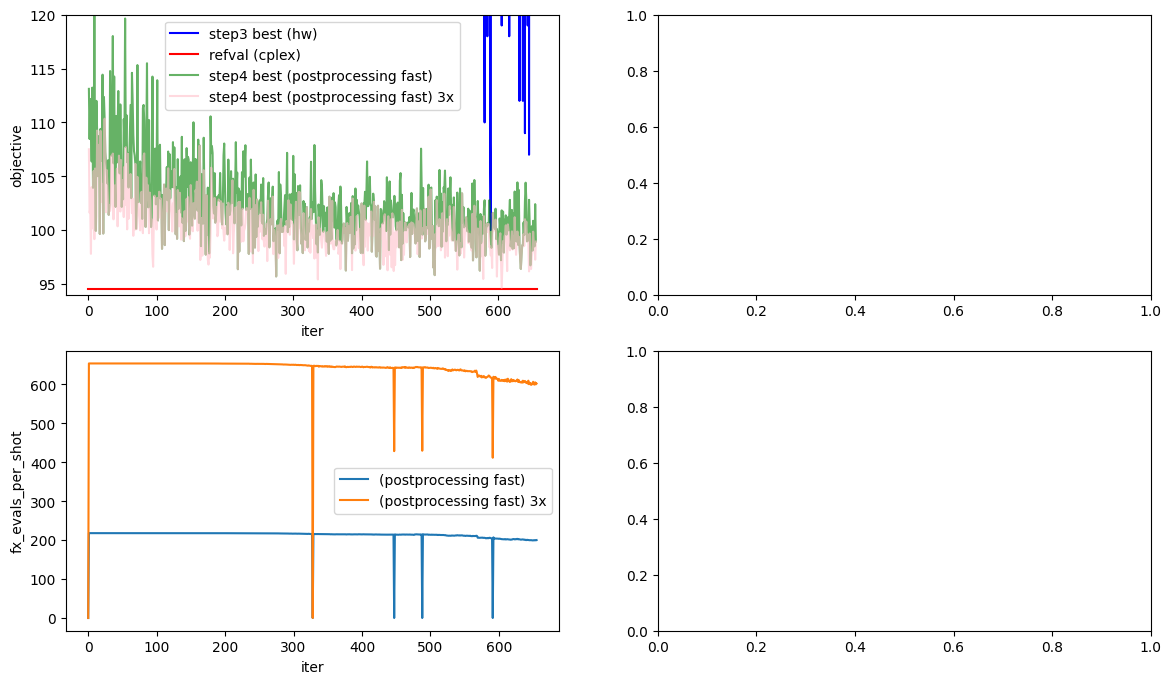

In [ ]:
_, axes = plt.subplots(2,2, figsize=(14,8))
axes=axes.T.flatten()

color_cvar = 'blue'
color_best3 = 'orange'
color_best4 = 'green'
color_best4_3 = 'pink'

for x in range(1):
    ds = df_all.reset_index().loc[x]
    # sns.lineplot(ds['step3_monitor_iter_gtheta'], label='step3 cvar (hw)', ax=axes[2*x])
    # sns.lineplot(ds['step3_monitor_iter_best_fx'], label='step3 (hw) best')
    sns.lineplot(ds['step3_iter_best_fx'], label='step3 best (hw)', ax=axes[2*x], c=color_cvar)
    sns.lineplot(x=[0,len(ds['step3_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', ax=axes[2*x])
    if isinstance(ds['step4_iter_best_fx'][1], list):
        sns.lineplot([None if y is None else y[0] if len(y) == 3 else None for y in ds['step4_iter_best_fx']], label='step4 best (postprocessing fast)', ax=axes[2*x], alpha=.6, c=color_best4)
        sns.lineplot([None if y is None else min(y) if not isinstance(y[0], list) else None for y in ds['step4_iter_best_fx']], label='step4 best (postprocessing fast) 3x', ax=axes[2*x], alpha=.6, c=color_best4_3)
    else:
        sns.lineplot(ds['step4_iter_best_fx'], label='step4 best (postprocessing fast) 3x', ax=axes[2*x], alpha=.6, c=color_best4_3)
    axes[2*x].set_ylim([94,1e6])
    axes[2*x].set_ylim([94,120])
    axes[2*x].set_xlabel('iter')
    axes[2*x].set_ylabel('objective')
    # if x != 2:
    # axes[2*x].get_legend().remove()
    if ds['step3_num_thetas'] == ds['step3_num_thetas']:
        axes[2*x].set_xticks(np.arange(0, len(ds['step3_iter_best_fx'])+1, ds['step3_num_thetas']))

    axes[2*x+1].plot(np.array([0 if y is None else y[0] if len(y) == 3 else 0 for y in ds['step4_fx_evals']]), label='(postprocessing fast)')
    axes[2*x+1].plot(np.array([0 if y is None else sum(y) for y in ds['step4_fx_evals']]), label='(postprocessing fast) 3x')
    axes[2*x+1].set_xlabel('iter')
    axes[2*x+1].set_ylabel('fx_evals_per_shot')
    axes[2*x+1].legend(loc='best')

In [6]:
print('step4 best (postprocessing fast): best res', np.min([1000 if y is None else y[0] if len(y) == 3 else 1000 for y in ds['step4_iter_best_fx']]))
print('step4 best (postprocessing fast) 3x: best res', np.min([1000 if y is None else min(y) if not isinstance(y[0], list) else 1000 for y in ds['step4_iter_best_fx']]))
print('refval:', ds['refvalue'])


step4 best (postprocessing fast): best res 95.6980708075098
step4 best (postprocessing fast) 3x: best res 94.64782189149992
refval: 94.49342731371144


In [7]:
# if the length is 2, it means that no update happened and the point was not re-evaluated
# length == 1 is somewhat due to restart, it happens at first iter of each epoch
[(idx, len(y)) for idx, y in enumerate(ds['step4_iter_best_fx']) if y is not None and len(y) != 3]

[(0, 1), (328, 1), (447, 2), (488, 2), (591, 2)]

In [8]:
[(idx, min(y), y[0]) for idx, y in enumerate(ds['step4_iter_best_fx']) if y is not None and min(y) != y[0]]

[(1, 107.50510693564138, 113.11562505968323),
 (2, 101.61235659747763, 108.45606243803195),
 (3, 101.97507416049848, 112.17478365694114),
 (4, 97.79696992960453, 110.1831269927352),
 (5, 103.99353636393789, 106.37232392152146),
 (6, 100.1645243216226, 113.23182927766902),
 (9, 99.15868300339935, 120.61969769588177),
 (12, 101.32978887693753, 112.00204040491735),
 (15, 106.3151242565691, 108.71532415389811),
 (18, 109.22007736417072, 109.3992464931107),
 (19, 104.59204499283805, 106.91930402541038),
 (20, 102.6153609375906, 106.44314666358696),
 (21, 104.22709972094162, 114.43572155059519),
 (23, 108.1187888010536, 112.3648921816748),
 (26, 101.65351140002167, 106.29327162816844),
 (27, 105.58445935045529, 105.67889639238274),
 (29, 102.70418320343379, 106.48198926256009),
 (32, 101.77766104229158, 114.77135548597653),
 (33, 102.43590389944075, 110.03695691492612),
 (35, 106.43433358034963, 110.24805574102356),
 (36, 107.10733382430408, 118.02000713839634),
 (37, 100.9996315082899, 106.

# Plots for slides

Text(0, 0.5, 'objective')

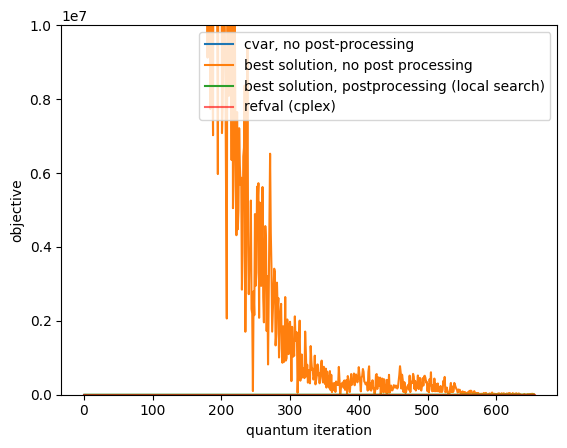

In [18]:
# TwoLocal2rep_color_piby3_fez_0.1/0

sns.lineplot([-1,-1], label='cvar, no post-processing')
sns.lineplot(ds['step3_iter_best_fx'], label='best solution, no post processing')
sns.lineplot([None if y is None else min(y) if not isinstance(y[0], list) else None for y in ds['step4_iter_best_fx']], label='best solution, postprocessing (local search)')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', alpha=.6)
plt.ylim([0,1e7])
# plt.ylim([40.2,42])
plt.xlabel('quantum iteration')
plt.ylabel('objective')


Text(0, 0.5, 'objective')

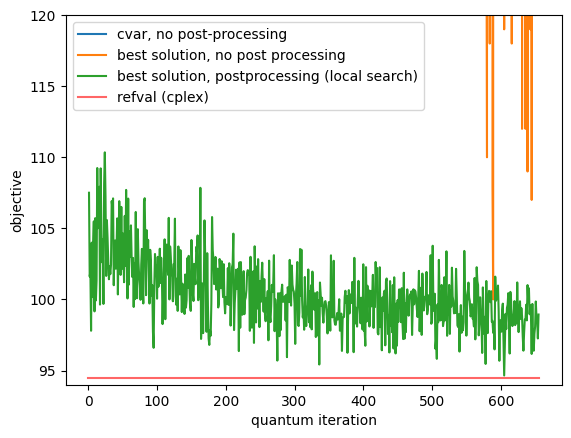

In [19]:
sns.lineplot([-1,-1], label='cvar, no post-processing')
sns.lineplot(ds['step3_iter_best_fx'], label='best solution, no post processing')
sns.lineplot([None if y is None else min(y) if not isinstance(y[0], list) else None for y in ds['step4_iter_best_fx']], label='best solution, postprocessing (local search)')
sns.lineplot(x=[0,len(ds['step4_iter_best_fx'])], y=[ds['refvalue'], ds['refvalue']], label='refval (cplex)', c='r', alpha=.6)
plt.ylim([94,120])
plt.xlabel('quantum iteration')
plt.ylabel('objective')


Text(0, 0.5, 'evaluations of the cost function during post processing')

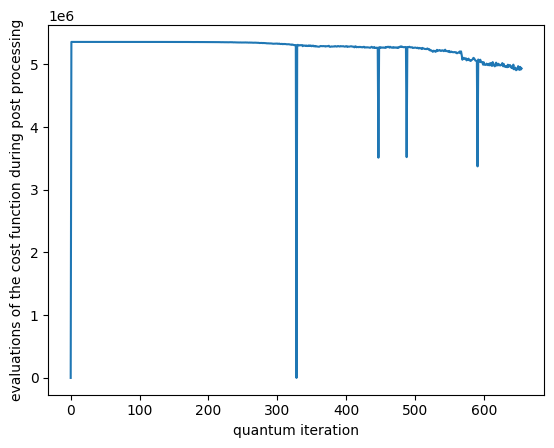

In [20]:
plt.plot(np.array([0 if y is None else sum(y) for y in ds['step4_fx_evals']]))
plt.xlabel('quantum iteration')
plt.ylabel('evaluations of the cost function during post processing')
# plt.legend(loc='best')